# Depths and Snow Pit Data Package Contents

(12 minutes)

Learning Objectives:
- Tools to access data.
- Code snippets to extract and prep data.

In [1]:
# standard imports
import os
from pathlib import Path
import glob
import pandas as pd
import numpy as np

#plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook'])

# unique imports
import s3fs #access data from the AWS s3 bucket

## Download snow depth data from NSIDC
From the SnowEx20 [Depth Probe Landing Page](https://nsidc.org/data/SNEX20_SD/versions/1), you can download data and access the [User's Guide](https://nsidc.org/sites/nsidc.org/files/SNEX20_SD-V001-UserGuide_1.pdf)
<img src="images/SD-landingPage.png">

The Community Snow Depth Probe data package is a single CSV with over 36,000 geolocated snow depths! Three different instrument types were used to measure depths and are recorded in the Measurement Tool column.

## Method 1: Programmatically download snow depth data from NSIDC

In [ ]:
%run './scripts/nsidc-download_SNEX20_SD.001.py' 
print('Grand Mesa 2020 Snow Depth data download complete') 

In [ ]:
# show filename:
path = Path('./data/depths/')

for filename in path.glob('*.csv'):
    print(filename.name)

## Method 2: Access data from our shared resources server
Quick and easy access for hackweek or if you haven't gone through the steps to [configure programmatic access](https://snowex-hackweek.github.io/website/preliminary/earthdata.html#configure-programmatic-access-to-nasa-servers) to NASA servers yet. This pulls data from our AWS, S3 bucket

In [ ]:
# Uses AWS credentials on machine
fs = s3fs.S3FileSystem() 

# which data bucket?
bucket = 'snowex-data'  
      
# contents inside /depths     
flist = fs.ls(f'{bucket}/tutorial-data/core-datasets/depths') 

# show list of files
print('File list is: ', flist)

### Read the Depth File

In [ ]:
# open depth data file, and create pandas dataframe
with fs.open(flist[0], 'rb') as f: 
    
    df = pd.read_csv(f, sep=',', header=0, parse_dates=[[2,3]]) #parse the date[2] and time[3] columns such that they are read in as datetime dtypes
    
print('file has been read, and is ready to use.')

In [ ]:
# check data types for each column
df.dtypes

### Prep for Data Analysis

In [ ]:
# rename some columns for ease further down
df.rename(columns = {
    'Measurement Tool (MP = Magnaprobe; M2 = Mesa 2; PR = Pit Ruler)':'Measurement Tool', 
    'Date (yyyymmdd)_Time (hh:mm, local, MST)': "Datetime"},
          inplace = True)

# set up filter for IOP date range
start = pd.to_datetime('1/28/2020') #first day of GM IOP campaign
end   = pd.to_datetime('2/12/2020') #last day of GM IOP campaign

# filter the IOP date range
df = df[(df['Datetime'] >= start) & (df['Datetime'] <= end)]

print('DataFrame shape is: ', df.shape)
df.head()

#### Use .groupby() to sort the data set

In [ ]:
# group data by the measurement tool 
gb = df.groupby('Measurement Tool', as_index=False).mean().round(1)

# show mean snow depth from each tool
gb[['Measurement Tool', 'Depth (cm)']]

#### ***Your turn***

In [ ]:
# group data by the snow pit ID


# show mean snow depth around each snow pit


#(hint: what is the pit id column called? If you're not sure you can use df.columns to see a list of column names. Consider using .head() to display only the first 5 returns)

#### Find depths associated with a certain measurement tool

In [ ]:
print('List of Measurement Tools: ', df['Measurement Tool'].unique())

In [ ]:
r = df.loc[df['Measurement Tool'] == 'PR']
print('DataFrame shape is: ', r.shape)
r.head()

#### ***Your turn***

In [ ]:
# find all depths recorded by the Mesa2


# (hint: copy/paste is your friend)

Let's make sure we all have the same pd.DataFrame() again

In [ ]:
# pit ruler snow depths from Grand Mesa IOP
r = df.loc[df['Measurement Tool'] == 'PR'] 
print( 'DataFrame is back to only pit ruler depths')

### Plotting

In [ ]:
# plot pit ruler depths 
ax = r.plot(x='Easting', y='Northing', c='Depth (cm)', kind='scatter', alpha=0.7, colorbar=True, colormap='PuBu', legend=True)
ax.set_title('Grand Mesa Pit Ruler Depths')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
plt.show()

print('Notice the point on the far right - that is the "GML" or Grand Mesa Lodge pit where all instruments were deployed for a comparison study. pitID=GML')

In [ ]:
# plot histogram of pit ruler depths
ax = r['Depth (cm)'].plot.hist(bins=25)
ax.grid()
ax.set_title('Grand Mesa Pit Ruler Depths')
ax.set_xlabel('Snow Depth (cm)')
ax.set_ylabel('Frequency')

## Download snow pit data from NSIDC
From the SnowEx20 [Snow Pit Landing Page](https://nsidc.org/data/SNEX20_GM_SP/versions/1), you can download data and access the [User's Guide](https://nsidc.org/data/SNEX20_GM_SP/versions/1). 

<img src="images/SP-landingPage.png">

## Method 1: Programmatically download snow pit data from NSIDC

In [2]:
# load snow pit data
%run 'scripts/nsidc-download_SNEX20_GM_SP.001.py'
print('Grand Mesa 2020 Snow Pit data download complete')

Querying for data:
	https://cmr.earthdata.nasa.gov/search/granules.json?provider=NSIDC_ECS&sort_key[]=start_date&sort_key[]=producer_granule_id&scroll=true&page_size=2000&short_name=SNEX20_GM_SP&version=001&version=01&version=1&temporal[]=2020-01-27T00:00:00Z,2020-02-12T23:59:59Z&options[producer_granule_id][pattern]=true&producer_granule_id[]=*5N19*

Found 1 matches.


Earthdata username:  cpiske
password:  ················


01/20: ./data/pits/SnowEx20_SnowPits_GMIOP_20200128_5N19_book1_v01.jpg
  [===============                                             ]  25%  7.0MB/s   [==============================                              ]  50%  10.0MB/s   [=============================================               ]  75%  11.7MB/s   [============================================================] 100%  13.9MB/s   
02/20: ./data/pits/SnowEx20_SnowPits_GMIOP_20200128_5N19_book2_v01.jpg
  [===============                                             ]  25%  7.3MB/s   [==============================                              ]  50%  10.4MB/s   [=============================================               ]  75%  12.2MB/s   [============================================================] 100%  13.3MB/s   
03/20: ./data/pits/SnowEx20_SnowPits_GMIOP_20200128_5N19_book_v01.jpg
  [============                                                ]  20%  7.3MB/s   [========================                                   

In [3]:
# show filenames
path = Path('./data/pits/')

for i, filename in enumerate(path.glob('*5N19*')):
    print(i, filename.name)

0 SnowEx20_SnowPits_GMIOP_20200128_5N19_pit1_v01.jpg
1 SnowEx20_SnowPits_GMIOP_20200128_5N19_stratigraphy_v01.csv
2 SnowEx20_SnowPits_GMIOP_20200128_5N19_up_v01.jpg
3 SnowEx20_SnowPits_GMIOP_20200128_5N19_east_v01.jpg
4 SnowEx20_SnowPits_GMIOP_20200128_5N19_LWC_v01.csv
5 SnowEx20_SnowPits_GMIOP_20200128_5N19_density_v01.csv
6 SnowEx20_SnowPits_GMIOP_20200128_5N19_north_v01.jpg
7 SnowEx20_SnowPits_GMIOP_20200128_5N19_SSA_v01.jpg
8 SnowEx20_SnowPits_GMIOP_20200128_5N19_book2_v01.jpg
9 SnowEx20_SnowPits_GMIOP_20200128_5N19_west_v01.jpg
10 SnowEx20_SnowPits_GMIOP_20200128_5N19_siteDetails_v01.csv
11 SnowEx20_SnowPits_GMIOP_20200128_5N19_pit_v01.jpg
12 SnowEx20_SnowPits_GMIOP_20200128_5N19_temperature_v01.csv
13 SnowEx20_SnowPits_GMIOP_20200128_5N19_v01.pdf
14 SnowEx20_SnowPits_GMIOP_20200128_5N19_v01.xlsx
15 SnowEx20_SnowPits_GMIOP_20200128_5N19_book_v01.jpg
16 SnowEx20_SnowPits_GMIOP_20200128_5N19_book1_v01.jpg
17 SnowEx20_SnowPits_GMIOP_20200128_5N19_south_v01.jpg
18 SnowEx20_SnowPits_GM

## Method 2: Access data from our shared resources server
Again, quick access for hackweek or if you haven't gone through the steps to [configure programmatic access](https://snowex-hackweek.github.io/website/preliminary/earthdata.html#configure-programmatic-access-to-nasa-servers) to NASA servers yet. This pulls data from our AWS, S3 bucket

In [4]:
# Uses AWS credentials on machine
fs = s3fs.S3FileSystem() 

# which data bucket?
bucket = 'snowex-data'  
      
# contents inside /pits     
flist = fs.ls(f'{bucket}/tutorial-data/core-datasets/pits/')

# which files do we want?
suffix='.csv'

# list comprehension to get .csv files (not .xlsx or .jpgs)
csv_files = [filename for filename in flist if filename.endswith(suffix)]
csv_files[:5]

['snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_LWC_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_density_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_siteDetails_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_stratigraphy_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_temperature_v01.csv']

### Don't want to work with all the files? Method to filter files

In [10]:
# what files would you like to find?
parameter = 'temperature'
pitID = '5N19'
date = '20200128'

### Read the Pit Parameter File

In [11]:
with fs.open('/snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_{}_{}_{}_v01.csv'.format(date, pitID, parameter), 'rb') as f:
    
    t = pd.read_csv(f, header=7)
t

,# Height (cm),Temperature (deg C)
0,102,-9.5
1,100,-9.4
2,90,-11.5
3,80,-7.5
4,70,-5.2
5,60,-4.1
6,50,-3.5
7,40,-3.0
8,30,-2.5
9,20,-2.1


### Plotting

Text(0, 0.5, 'Snow Depth (cm)')

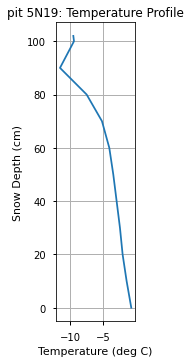

In [12]:
# plot temperature
ax = t.plot(x='Temperature (deg C)',y='# Height (cm)', legend=False)
ax.set_aspect(0.4)
ax.grid()
ax.set_title('pit {}: Temperature Profile'.format(pitID))
ax.set_xlabel('Temperature (deg C)')
ax.set_ylabel('Snow Depth (cm)')

In [13]:
# grab a different pit parameter file
parameter = 'density'
with fs.open('/snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_{}_{}_{}_v01.csv'.format(date, pitID, parameter), 'rb') as f:

    d = pd.read_csv(f, header=7)
d

,# Top (cm),Bottom (cm),Density A (kg/m3),Density B (kg/m3),Density C (kg/m3)
0,102.0,92.0,136.0,138.0,NaN
1,92.0,82.0,193.0,192.0,NaN
2,82.0,72.0,232.0,221.0,NaN
3,72.0,62.0,262.0,260.0,NaN
4,62.0,52.0,275.0,278.0,NaN
5,52.0,42.0,261.0,252.0,NaN
6,42.0,32.0,267.0,269.0,NaN
7,32.0,22.0,336.0,367.0,NaN
8,22.0,12.0,268.0,246.0,NaN
9,12.0,2.0,262.0,271.0,NaN


In [14]:
# get the average density 
d['Avg Density (kg/m3)'] = d[['Density A (kg/m3)', 'Density B (kg/m3)', 'Density C (kg/m3)']].mean(axis=1, skipna=True)
d

,# Top (cm),Bottom (cm),Density A (kg/m3),Density B (kg/m3),Density C (kg/m3),Avg Density (kg/m3)
0,102.0,92.0,136.0,138.0,NaN,137.0
1,92.0,82.0,193.0,192.0,NaN,192.5
2,82.0,72.0,232.0,221.0,NaN,226.5
3,72.0,62.0,262.0,260.0,NaN,261.0
4,62.0,52.0,275.0,278.0,NaN,276.5
5,52.0,42.0,261.0,252.0,NaN,256.5
6,42.0,32.0,267.0,269.0,NaN,268.0
7,32.0,22.0,336.0,367.0,NaN,351.5
8,22.0,12.0,268.0,246.0,NaN,257.0
9,12.0,2.0,262.0,271.0,NaN,266.5


Text(0, 0.5, 'Snow Depth (cm)')

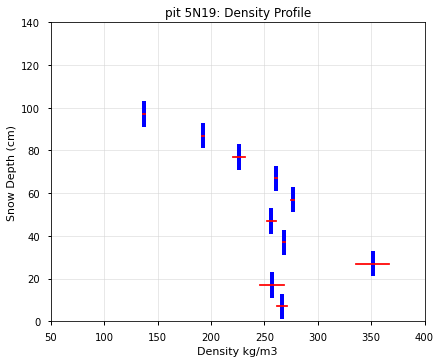

In [15]:
def plot_density(ax, dataframe):
    
    '''
    This function helps you plot density profiles from snow pits. Use it to iterate through 
    DataFrame rows and plot the density for each top and bottom segment.
    
    '''
    
    for index, row in dataframe.iterrows():
        # plot blue bars to represent 10cm density intervals
        top = row['# Top (cm)']
        bottom = row['Bottom (cm)']
        dens = row["Avg Density (kg/m3)"]
        ax.plot([dens, dens],[bottom, top], color='blue', linewidth=4)

        # plot a red cross to show the spread between A and B samples
        densA = row["Density A (kg/m3)"]
        densB = row["Density B (kg/m3)"]
        middle = bottom + 5.
        ax.plot([densA, densB],[middle,middle], color='red')
        
    return ax

fig, ax = plt.subplots()
ax = plot_density(ax, d)
ax.set_xlim(50, 400)
ax.set_ylim(0, 140)
ax.grid(color='lightgray', alpha=.5)
ax.set_aspect(2)
ax.set_title('pit {}: Density Profile'.format(pitID))
ax.set_xlabel('Density kg/m3')
ax.set_ylabel('Snow Depth (cm)')   